In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('ADANIPORTS.csv')

In [4]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [5]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [6]:
df.fillna(method='ffill',inplace=True)

C:\Users\kavin\AppData\Local\Temp\ipykernel_21528\4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [9]:
df = df[:-1]

In [10]:
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
df_model=AdaBoostClassifier(n_estimators=50,learning_rate=10,random_state=42)
df_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=10, random_state=42)

In [14]:
y_pred = df_model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.53


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.15      0.23       305
           1       0.54      0.85      0.66       360

    accuracy                           0.53       665
   macro avg       0.50      0.50      0.44       665
weighted avg       0.50      0.53      0.46       665



In [17]:
import joblib

In [18]:
joblib.dump(df_model, 'df_model.pkl')


['df_model.pkl']

In [19]:
df_model=joblib.load('df_model.pkl')

In [20]:
# Example: Latest data for prediction
latest_data = pd.DataFrame({
    'Open': [1300.0],  # Replace with the latest Open price
    'High': [2000.0],  # Replace with the latest High price
    'Low': [1500.0],   # Replace with the latest Low price
    'Volume': [120000]  # Replace with the latest Volume
})

# Standardize the latest data using the same scaler
latest_data_scaled = scaler.transform(latest_data)

In [21]:
# Predict the direction
predicted_direction = df_model.predict(latest_data_scaled)
print(f'Predicted Direction: {"Up" if predicted_direction[0] == 1 else "Down"}')

Predicted Direction: Up


In [22]:
# Example: Predict the next day's price
current_price = 122  # Replace with the latest Close price
average_up_percentage = 1  # Example: 2% average increase
average_down_percentage = 0.1  # Example: 1.5% average decrease

if predicted_direction[0] == 1:
    predicted_price = current_price * (1 + average_up_percentage)
else:
    predicted_price = current_price * (1 - average_down_percentage)

print(f'Predicted Next Day Price: {predicted_price:.2f}')

Predicted Next Day Price: 244.00


In [23]:
import tensorflow as tf

In [24]:
import matplotlib.pyplot as plt

In [25]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [26]:
df=df['Close'].values.reshape(-1,1)

In [27]:
scaler=MinMaxScaler(feature_range=(0,1))

In [28]:
scaled_data=scaler.fit_transform(df)

In [29]:
sequence_length=60

In [30]:
X_train,y_train=[],[]
for i in range(sequence_length, len(scaled_data)):
    X_train.append(scaled_data[i-sequence_length:i,0])
    y_train.append(scaled_data[i,0])
X_train , y_train = np.array(X_train),np.array(y_train)

In [31]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [32]:
model=Sequential()

In [33]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

C:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.add(Dense(units=1))


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0118 - val_loss: 0.0011
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0016 - val_loss: 3.2305e-04
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0013 - val_loss: 5.7187e-04
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0012 - val_loss: 3.5228e-04
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0013 - val_loss: 2.7720e-04
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0011 - val_loss: 2.6179e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0010 - val_loss: 2.9057e-04
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 8.1917e-04 - val_loss: 2.3221e-04
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 9.9429e-04 - val_loss: 2.0052e-04
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 7.0257e-04 - val_loss: 4.3237e-04
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 7.6321e-04 - val_loss: 1.8587e-04
Epoch 

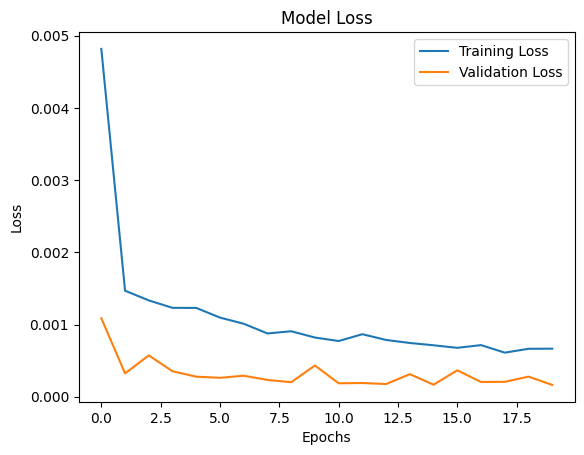

In [38]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
test_data = scaled_data[-sequence_length:]

X_test = np.array(test_data)
X_test = np.reshape(X_test, (1, X_test.shape[0], 1))

In [40]:

predicted_price_scaled = model.predict(X_test)


predicted_price = scaler.inverse_transform(predicted_price_scaled)
print(f'Predicted Next Day Price: {predicted_price[0][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Predicted Next Day Price: 730.09


In [41]:
n = 10
predictions = []
current_batch = test_data.reshape(1, sequence_length, 1)

for i in range(n):
    next_prediction_scaled = model.predict(current_batch)[0]
    predictions.append(next_prediction_scaled)

    
    current_batch = np.append(current_batch[:, 1:, :], [[next_prediction_scaled]], axis=1)

#
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print(f'Predicted Prices for the Next {n} Days:')
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Prices for the Next 10 Days:
[[730.0909 ]
 [727.80664]
 [722.43274]
 [715.5426 ]
 [707.9377 ]
 [700.0785 ]
 [692.2542 ]
 [684.6518 ]
 [677.3881 ]
 [670.52747]]


In [42]:
!pip install textblob


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from textblob import TextBlob

In [44]:
!pip install requests


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
!pip install bs4


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import requests
from bs4 import BeautifulSoup

In [47]:
url="https://www.msn.com/en-in/money/top-stocks/adani-enterprises-to-exit-adani-wilmar-jv-ael-stock-jumped-8/ar-AA1wH6qU?ocid=BingNewsSerp"

In [48]:
response=requests.get(url)
soup=BeautifulSoup(response.text,'html.parser')


In [49]:
articles = soup.find_all('div', class_='article-content')
for article in articles:
    print(article.get_text())

In [50]:
from textblob import TextBlob

In [51]:
article_text = "Adani Enterprises to exit Adani Wilmar JV; AEL stock jumped 8%."


sentiment = TextBlob(article_text).sentiment
print(f'Sentiment Polarity: {sentiment.polarity}') 
print(f'Sentiment Subjectivity: {sentiment.subjectivity}')

Sentiment Polarity: 0.0
Sentiment Subjectivity: 0.0


In [52]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kavin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

article_text = "Adani Enterprises to exit Adani Wilmar JV; AEL stock jumped 8%."

sentiment = analyzer.polarity_scores(article_text)
print(f'VADER Sentiment: {sentiment}')

VADER Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [55]:
model.save('adani_lstm_model.h5')

In [56]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'adani_scaler.pkl')

['adani_scaler.pkl']

In [59]:
import keras


In [ ]:
model.save(adani_lstm_model.keras